In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
summary_df = pd.read_csv('./resources/extinction/summary.csv', header=[0, 1])
summary_df

60min_x1_1h                       60min_x1_6h                        \
          RET        EXT         EM         RET        EXT         EM   
0   67.500000  31.836667  16.116667   48.066667  26.530000   5.000000   
1   38.600000  22.335833   7.783333   37.216667  17.485000  10.566667   
2   36.933333  24.539167  13.600000   64.166667  19.810833  19.733333   
3   67.783333  33.275833  26.100000   32.766667  39.707500  20.000000   

  30min_x2_1h                       30min_x2_6h                        \
          RET        EXT         EM         RET        EXT         EM   
0   54.450000  21.932500  39.450000   59.733333  37.337500  11.116667   
1   32.216667  22.196667  15.000000   40.833333  35.181667  33.050000   
2   49.450000  53.849167  36.400000   54.733333  40.029167  42.216667   
3   28.333333  32.763333  55.833333   65.283333  41.643333  41.683333   

  3min_x6_1h                       3min_x6_6h                        
         RET        EXT         EM        RET        EXT         EM  
0  50.833333  63.033333  58.316667  67.766667  45.266667  49.388889  
1  61.683333  12.216667   9.716667  45.016667  47.800000  34.913889  
2  26.116667  20.266667  39.183333  38.350000  40.300000  34.405556  
3  20.833333  22.500000  23.333333  22.766667   3.616667  22.455556

## 60min x 1

In [3]:
df = summary_df.iloc[:, 0:6]
df

60min_x1_1h                       60min_x1_6h                      
          RET        EXT         EM         RET        EXT         EM
0   67.500000  31.836667  16.116667   48.066667  26.530000   5.000000
1   38.600000  22.335833   7.783333   37.216667  17.485000  10.566667
2   36.933333  24.539167  13.600000   64.166667  19.810833  19.733333
3   67.783333  33.275833  26.100000   32.766667  39.707500  20.000000

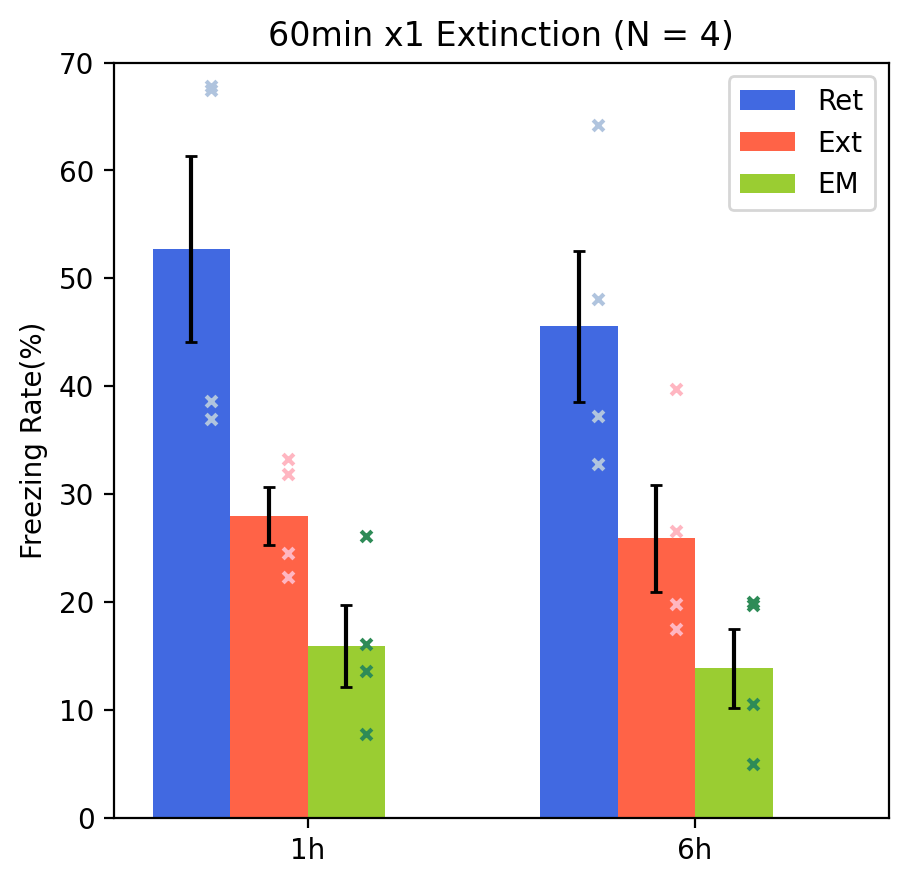

In [4]:
labels = np.array(['1h', '6h'])

df = summary_df.iloc[:, 0:6]

ret = df.iloc[:, [0, 3]]
ext = df.iloc[:, [1, 4]]
em  = df.iloc[:, [2, 5]]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * 4, ret.iloc[:, 0], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * 4, ext.iloc[:, 0], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * 4, em.iloc[:, 0], c='seagreen', zorder=12, s=15, marker='x')
#plt.scatter([0.35] * 4, srt.loc[:, '1h_SRT'], c='grey', zorder=12, s=15, marker='x')

plt.scatter([0.75] * 4, ret.iloc[:, 1], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * 4, ext.iloc[:, 1], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * 4, em.iloc[:, 1], c='seagreen', zorder=12, s=15, marker='x')
#plt.scatter([1.35] * 4, srt.loc[:, '6h_SRT'], c='grey', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('60min x1 Extinction (N = 4)')
ax.legend()
fig.show()

In [5]:
extinction_1h_df = pd.read_csv('./resources/extinction/60min_x1_1h_extinction.csv', header=[0])
extinction_6h_df = pd.read_csv('./resources/extinction/60min_x1_6h_extinction.csv', header=[0])

/tmp/ipykernel_172/289597468.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=30)


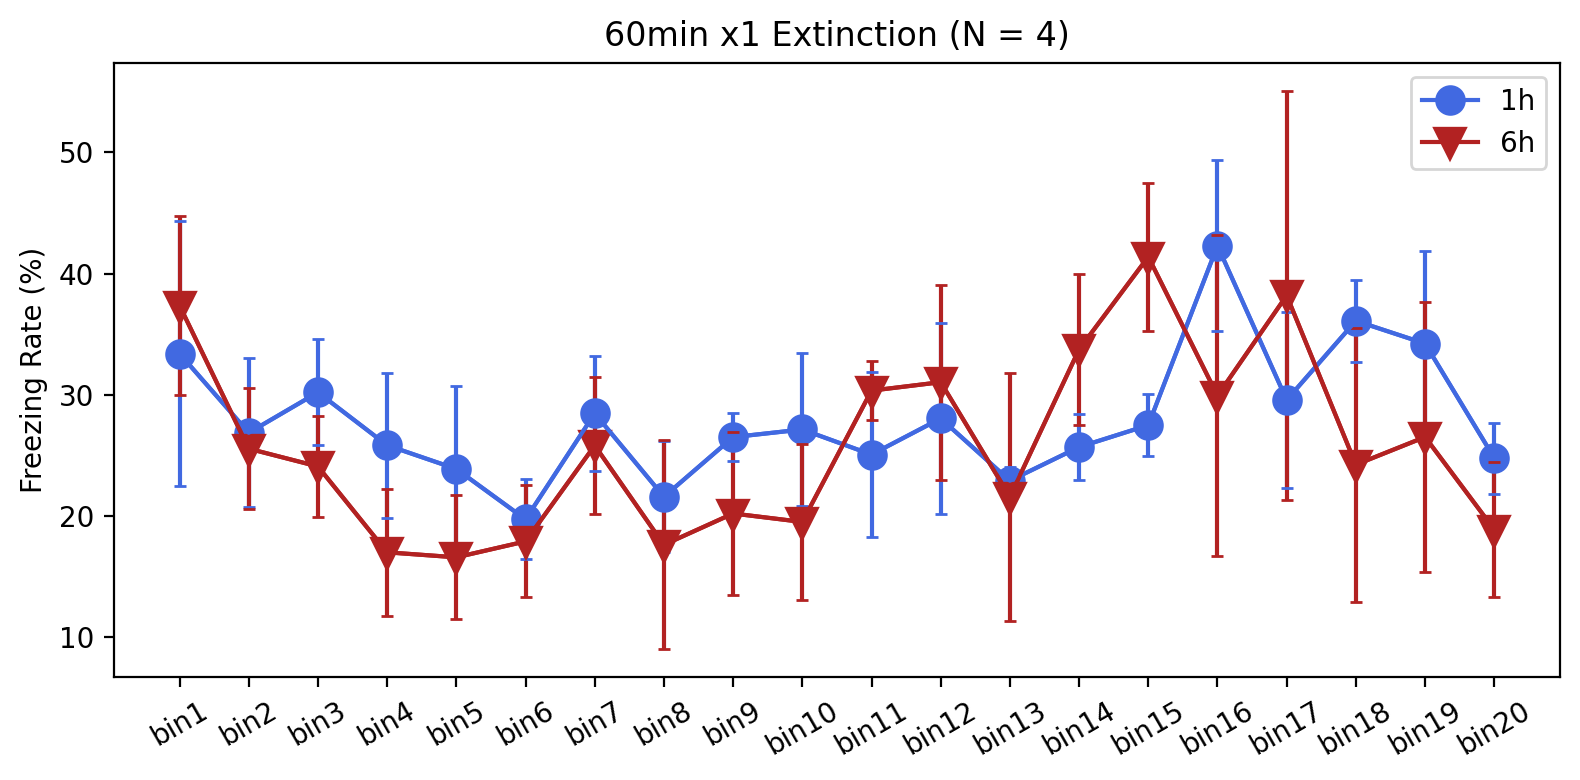

In [6]:
x = extinction_1h_df.columns

y_for_1h = extinction_1h_df.mean()
error_for_1h = extinction_1h_df.sem()

y_for_6h = extinction_6h_df.mean()
error_for_6h = extinction_6h_df.sem()

fig, ax = plt.subplots(1, figsize=(8, 4), dpi=200, tight_layout=True)

ax.errorbar(x, y_for_1h, yerr=error_for_1h, capsize=2, color='royalblue')
ax.plot(x, y_for_1h, marker="o", markersize=8, markeredgewidth=3, label='1h', color='royalblue')

ax.errorbar(x, y_for_6h, yerr=error_for_6h, capsize=2, color='firebrick')
ax.plot(x, y_for_6h, marker="v", markersize=8, markeredgewidth=3, label='6h', color='firebrick')

ax.set_ylabel('Freezing Rate (%)')
ax.set_xticklabels(x, rotation=30)
ax.set_title('60min x1 Extinction (N = 4)')
ax.legend()

plt.show()

## 30min x2

In [7]:
df = summary_df.iloc[:, 6:12]
df

30min_x2_1h                       30min_x2_6h                      
          RET        EXT         EM         RET        EXT         EM
0   54.450000  21.932500  39.450000   59.733333  37.337500  11.116667
1   32.216667  22.196667  15.000000   40.833333  35.181667  33.050000
2   49.450000  53.849167  36.400000   54.733333  40.029167  42.216667
3   28.333333  32.763333  55.833333   65.283333  41.643333  41.683333

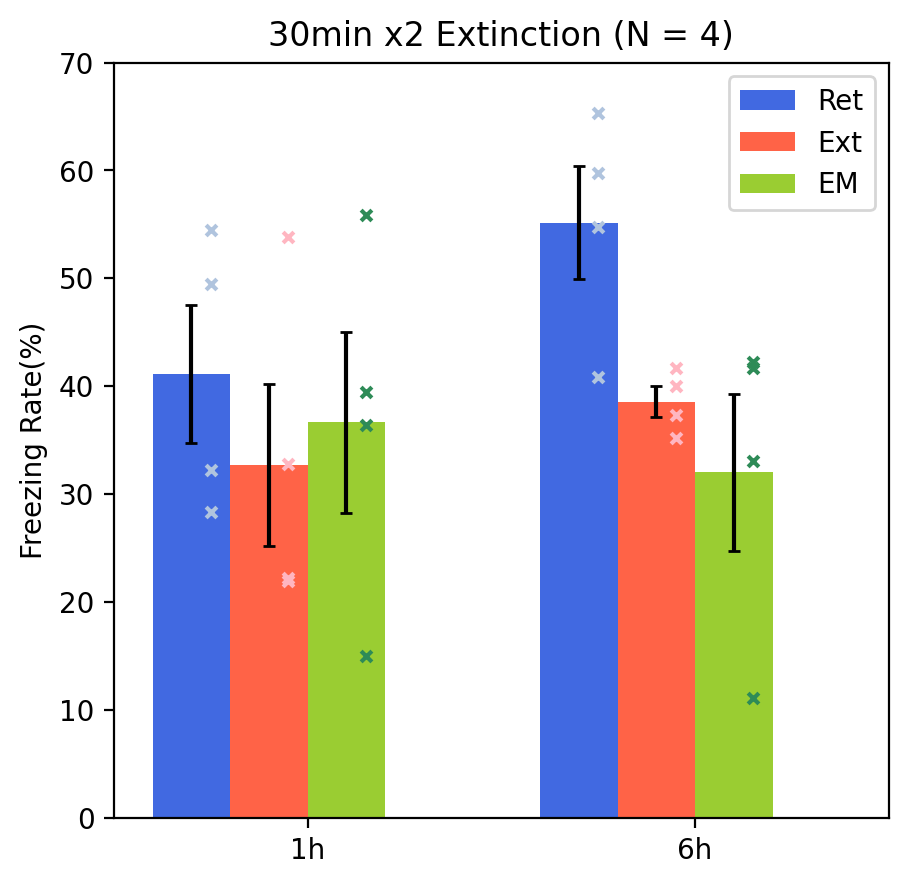

In [8]:
labels = np.array(['1h', '6h'])

df = summary_df.iloc[:, 6:12]

ret = df.iloc[:, [0, 3]]
ext = df.iloc[:, [1, 4]]
em  = df.iloc[:, [2, 5]]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * 4, ret.iloc[:, 0], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * 4, ext.iloc[:, 0], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * 4, em.iloc[:, 0], c='seagreen', zorder=12, s=15, marker='x')
#plt.scatter([0.35] * 4, srt.loc[:, '1h_SRT'], c='grey', zorder=12, s=15, marker='x')

plt.scatter([0.75] * 4, ret.iloc[:, 1], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * 4, ext.iloc[:, 1], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * 4, em.iloc[:, 1], c='seagreen', zorder=12, s=15, marker='x')
#plt.scatter([1.35] * 4, srt.loc[:, '6h_SRT'], c='grey', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('30min x2 Extinction (N = 4)')
ax.legend()
fig.show()

In [9]:
extinction_1h_df = pd.read_csv('./resources/extinction/30min_x2_1h_extinction.csv', header=[0])
extinction_6h_df = pd.read_csv('./resources/extinction/30min_x2_6h_extinction.csv', header=[0])

/tmp/ipykernel_172/476129252.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(x, rotation=30)
/tmp/ipykernel_172/476129252.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(x, rotation=30)


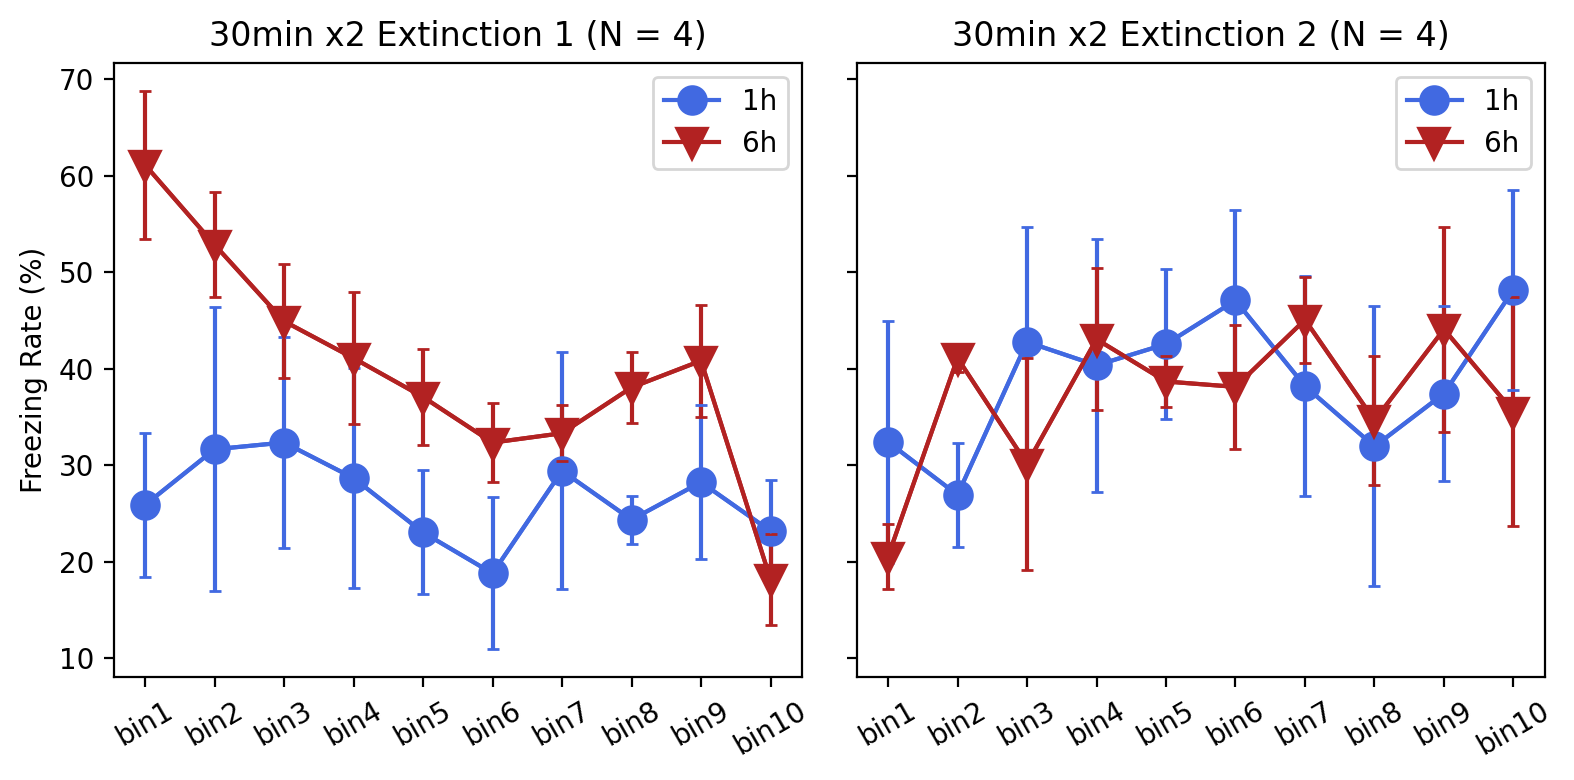

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True)

extinction_1h_1_df = extinction_1h_df.iloc[:, 0:10]
extinction_1h_2_df = extinction_1h_df.iloc[:, 10:]

extinction_6h_1_df = extinction_6h_df.iloc[:, 0:10]
extinction_6h_2_df = extinction_6h_df.iloc[:, 10:]

# 前半部分
x_1 = extinction_1h_1_df.columns

y_1_for_1h = extinction_1h_1_df.mean()
error_1_for_1h = extinction_1h_1_df.sem()

y_1_for_6h = extinction_6h_1_df.mean()
error_1_for_6h = extinction_6h_1_df.sem()

axes[0].errorbar(x_1, y_1_for_1h, yerr=error_1_for_1h, capsize=2, color='royalblue')
axes[0].plot(x_1, y_1_for_1h, marker="o", markersize=8, markeredgewidth=3, label='1h', color='royalblue')

axes[0].errorbar(x_1, y_1_for_6h, yerr=error_1_for_6h, capsize=2, color='firebrick')
axes[0].plot(x_1, y_1_for_6h, marker="v", markersize=8, markeredgewidth=3, label='6h', color='firebrick')

axes[0].set_ylabel('Freezing Rate (%)')
axes[0].set_xticklabels(x, rotation=30)
axes[0].set_title('30min x2 Extinction 1 (N = 4)')
axes[0].legend()

# 後半部分
x_2 = extinction_1h_2_df.columns

y_2_for_1h = extinction_1h_2_df.mean()
error_2_for_1h = extinction_1h_2_df.sem()

y_2_for_6h = extinction_6h_2_df.mean()
error_2_for_6h = extinction_6h_2_df.sem()

axes[1].errorbar(x_2, y_2_for_1h, yerr=error_2_for_1h, capsize=2, color='royalblue')
axes[1].plot(x_2, y_2_for_1h, marker="o", markersize=8, markeredgewidth=3, label='1h', color='royalblue')

axes[1].errorbar(x_2, y_2_for_6h, yerr=error_2_for_6h, capsize=2, color='firebrick')
axes[1].plot(x_2, y_2_for_6h, marker="v", markersize=8, markeredgewidth=3, label='6h', color='firebrick')

# axes[1].set_ylabel('Freezing Rate (%)')
axes[1].set_xticklabels(x, rotation=30)
axes[1].set_title('30min x2 Extinction 2 (N = 4)')
axes[1].legend()

plt.show()

## 3min x6

In [11]:
df = summary_df.iloc[:, 12:18]
df

3min_x6_1h                       3min_x6_6h                      
         RET        EXT         EM        RET        EXT         EM
0  50.833333  63.033333  58.316667  67.766667  45.266667  49.388889
1  61.683333  12.216667   9.716667  45.016667  47.800000  34.913889
2  26.116667  20.266667  39.183333  38.350000  40.300000  34.405556
3  20.833333  22.500000  23.333333  22.766667   3.616667  22.455556

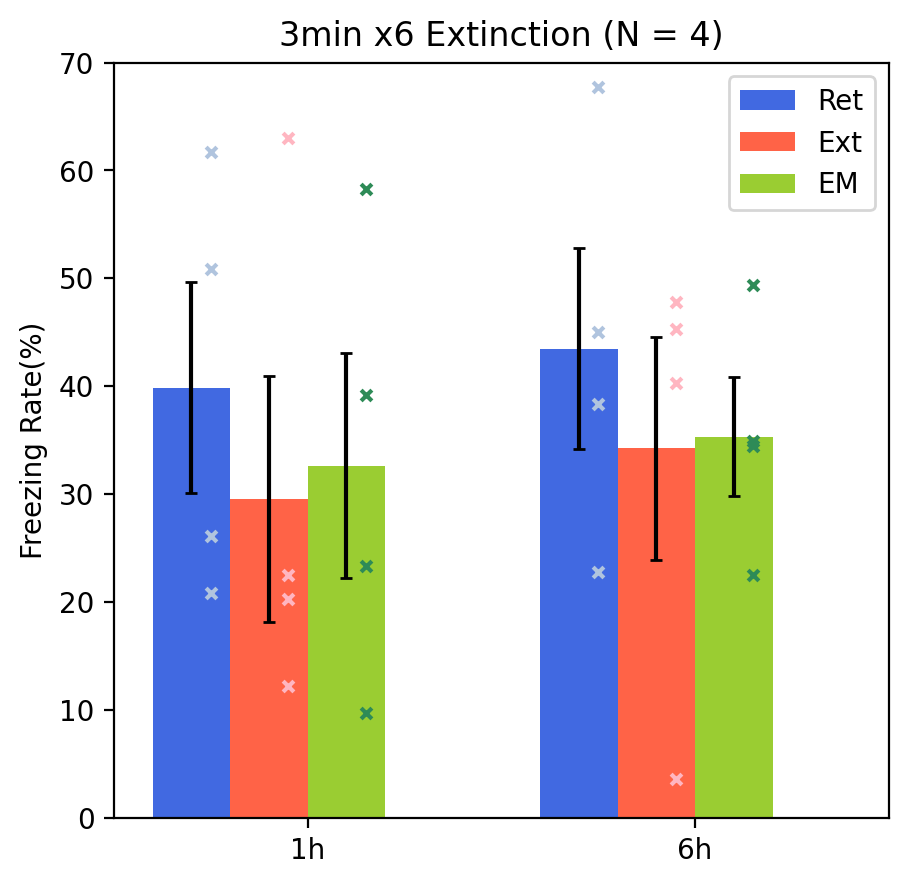

In [12]:
labels = np.array(['1h', '6h'])

df = summary_df.iloc[:, 12:18]

ret = df.iloc[:, [0, 3]]
ext = df.iloc[:, [1, 4]]
em  = df.iloc[:, [2, 5]]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * 4, ret.iloc[:, 0], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * 4, ext.iloc[:, 0], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * 4, em.iloc[:, 0], c='seagreen', zorder=12, s=15, marker='x')
#plt.scatter([0.35] * 4, srt.loc[:, '1h_SRT'], c='grey', zorder=12, s=15, marker='x')

plt.scatter([0.75] * 4, ret.iloc[:, 1], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * 4, ext.iloc[:, 1], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * 4, em.iloc[:, 1], c='seagreen', zorder=12, s=15, marker='x')
#plt.scatter([1.35] * 4, srt.loc[:, '6h_SRT'], c='grey', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('3min x6 Extinction (N = 4)')
ax.legend()
fig.show()

In [13]:
extinction_1h_df = pd.read_csv('./resources/extinction/3min_x6_1h_extinction.csv', header=[0])
extinction_6h_df = pd.read_csv('./resources/extinction/3min_x6_6h_extinction.csv', header=[0])

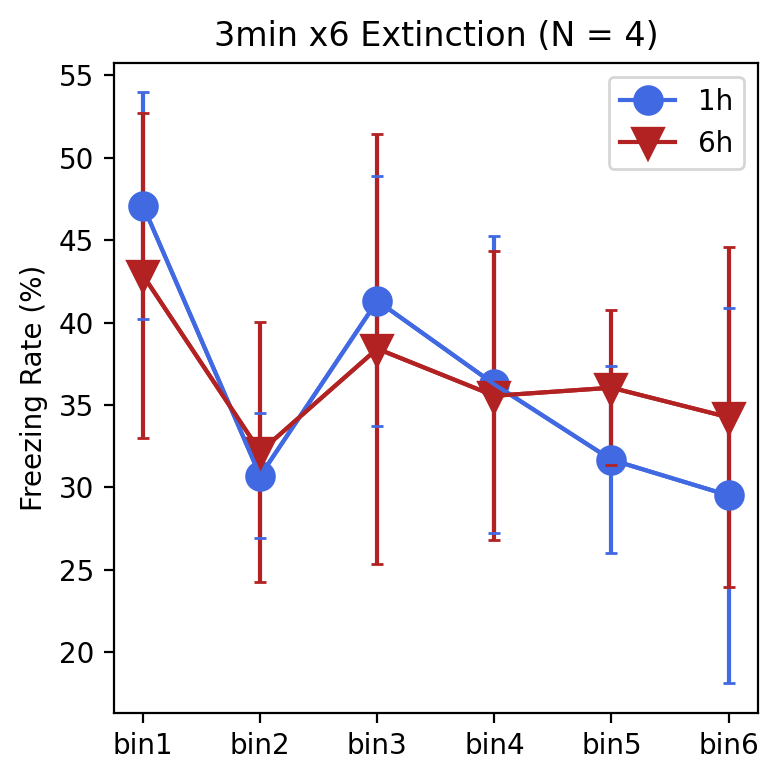

In [14]:
x = extinction_1h_df.columns

y_for_1h = extinction_1h_df.mean()
error_for_1h = extinction_1h_df.sem()

y_for_6h = extinction_6h_df.mean()
error_for_6h = extinction_6h_df.sem()

fig, ax = plt.subplots(1, figsize=(4, 4), dpi=200, tight_layout=True)

ax.errorbar(x, y_for_1h, yerr=error_for_1h, capsize=2, color='royalblue')
ax.plot(x, y_for_1h, marker="o", markersize=8, markeredgewidth=3, label='1h', color='royalblue')

ax.errorbar(x, y_for_6h, yerr=error_for_6h, capsize=2, color='firebrick')
ax.plot(x, y_for_6h, marker="v", markersize=8, markeredgewidth=3, label='6h', color='firebrick')

ax.set_ylabel('Freezing Rate (%)')
ax.set_title('3min x6 Extinction (N = 4)')
ax.legend()

plt.show()

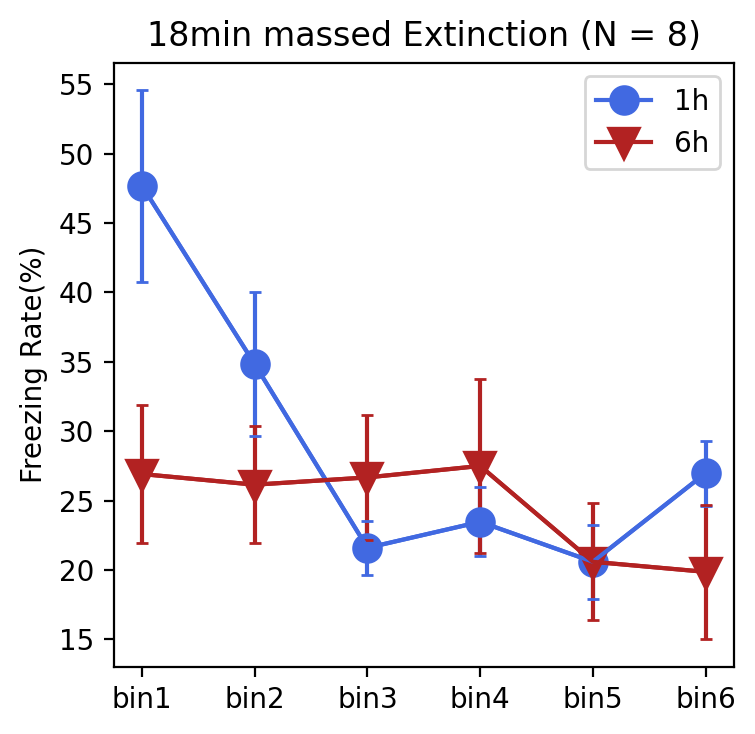

In [15]:
fig, axes = plt.subplots(1, figsize=(4, 4), dpi=200, sharex=True)
iteritems = ['1h', '6h']
labels = ['#%d' % i for i in range(8)]
for index, interval in enumerate(iteritems):
    ax = axes
    file_path = './resources/%s_result_n8.csv' % interval
    session_df = pd.read_csv(file_path)
    session_df = session_df.iloc[:, 1:7]
    
    x = ['bin%d' % i for i in range(1, 7)]
    y = session_df.mean()
    error = session_df.sem()
    color = 'royalblue' if interval == '1h' else 'firebrick'
    marker = 'o' if interval == '1h' else 'v'
    
    ax.errorbar(x, y, yerr=error, capsize=2, color=color)
    ax.plot(x, y, marker=marker, markersize=8, markeredgewidth=3, label=interval, color=color)
    
    ax.set_ylabel('Freezing Rate(%)')
    ax.legend()
axes.set_title('18min massed Extinction (N = 8)')
plt.show()